<a href="https://colab.research.google.com/github/KauaHenSilva/KauaHenSilva/blob/main/python_atividade_neural_networks_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [32]:
from google.colab import drive
import os
import shutil
import zipfile
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
path_data_base = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/cat_dog_1.zip'
if not os.path.exists('cat_dog_1'):
  with zipfile.ZipFile(path_data_base, 'r') as zip:
    zip.extractall()
  shutil.rmtree('__MACOSX')
  os.remove('cat_dog.zip')

In [49]:
paths = [os.path.join('cat_dog_1/train/', x) for x in sorted(os.listdir('cat_dog_1/train/'))]

# Tratamento de imagens

In [35]:
import cv2
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sizeH, sizeW = 128, 128

In [37]:
imagens = []
classes = []

for path in paths:
    imagem = cv2.imread(path)
    imagem = cv2.resize(imagem, (sizeH, sizeW))
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    imagem = imagem.ravel()

    imagens.append(imagem)

    if(os.path.basename(path).startswith('cat')):
      classes.append(0)
    else:
      classes.append(1)

imagens_np = np.array(imagens)
classes_np = np.array(classes)

print(imagens_np.shape)
print(classes_np.shape)
print(np.unique(classes_np, return_counts=True))

(4000, 16384)
(4000,)
(array([0, 1]), array([2000, 2000]))


# Normalização

In [38]:
X = imagens_np
y = classes_np

In [39]:
X[0].max(), X[0].min()

(236, 1)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0].max(), X[0].min()

(0.9254901960784314, 0.0)

# Base treino, base test

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2800, 16384), (1200, 16384), (2800,), (1200,))

# Construção é treinamento

In [42]:
units = int((X.shape[1] + np.unique(y).shape[0]) / 2)
units

8193

In [43]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(units=units, activation='relu', input_shape=(X.shape[1],)))
network.add(tf.keras.layers.Dense(units=units, activation='relu'))
network.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
network.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
historico = network.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.4945 - loss: 25.0144 - val_accuracy: 0.5008 - val_loss: 0.7536
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5446 - loss: 0.7252 - val_accuracy: 0.5175 - val_loss: 0.6915
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5794 - loss: 0.6670 - val_accuracy: 0.5425 - val_loss: 0.6887
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5934 - loss: 0.6769 - val_accuracy: 0.5308 - val_loss: 0.6803
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5630 - loss: 0.6721 - val_accuracy: 0.5325 - val_loss: 0.6801
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5793 - loss: 0.6733 - val_accuracy: 0.5158 - val_loss: 0.6929
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5619 - loss: 0.6875 - val_accuracy: 0.5392 - val_loss: 0.6931
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5839 - loss: 0.6920 - val_accuracy: 0.5258 -

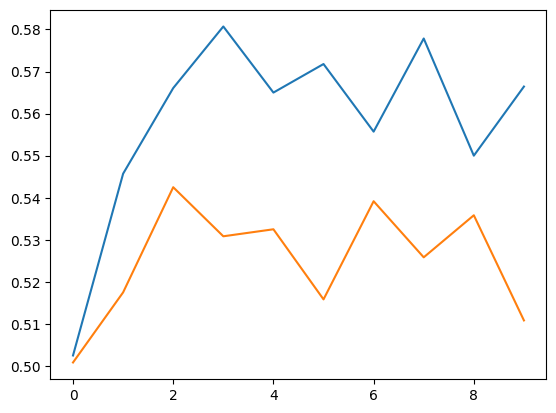

In [46]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])

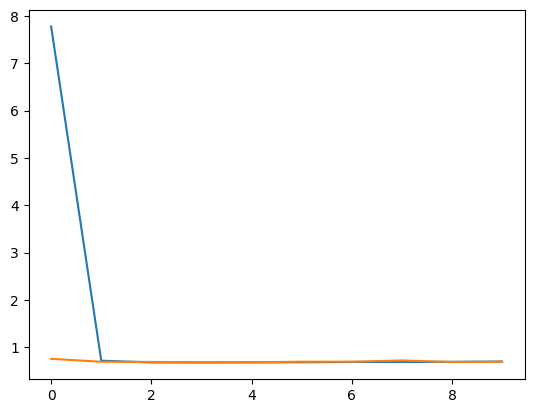

In [47]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = network.predict(X_test)
y_pred = (y_pred >= 0.5)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[ 73 543]
 [ 44 540]]
              precision    recall  f1-score   support

           0       0.62      0.12      0.20       616
           1       0.50      0.92      0.65       584

    accuracy                           0.51      1200
   macro avg       0.56      0.52      0.42      1200
weighted avg       0.56      0.51      0.42      1200

